In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import lmfit
import numpy as np
from astropy.io import ascii
from astropy import units as u
from lmfit.models import PolynomialModel, GaussianModel
from lmfit import Model as mod
from lmfit import minimize, Parameters, report_fit
import scipy.integrate as integrate
import scipy.special as spec

In [2]:
# Open the file in read mode
with open('C:/Users/dhami/Research/STARTastro/DhamiBusch-Research25/OHData/159500n20000_67_ii.ascii', 'r') as file:
    # Read the content of the file
    content = file.read()
# Print the content
print(content)

Scan:      6     159500-20000 2023-10-14 +01 16 35.5
          RADIO                  Ta    
        km/s-LSR                 I
       -991.2075961675745     -0.1954584
       -990.2816864051788     -0.1933326
       -989.3557766427830     -0.1922946
       -988.4298668803207     -0.1953000
       -987.5039571179250     -0.1917579
       -986.5780473555292     -0.1925162
       -985.6521375931334     -0.1955920
       -984.7262278307376     -0.1920820
       -983.8003180682753     -0.1943374
       -982.8744083058796     -0.1876923
       -981.9484985434838     -0.1876896
       -981.0225887810880     -0.1901431
       -980.0966790186923     -0.1932248
       -979.1707692562298     -0.1954865
       -978.2448594938340     -0.1895063
       -977.3189497314385     -0.1907352
       -976.3930399690427     -0.1907204
       -975.4671302066469     -0.1884487
       -974.5412204441845     -0.1894762
       -973.6153106817887     -0.1866843
       -972.6894009193931     -0.1883685
       -971

In [3]:
len(content)

134485

In [4]:
# Replace 'file_path.txt' with the path to your ASCII file
file_path = 'C:/Users/dhami/Research/STARTastro/DhamiBusch-Research25/OHData/159500n20000_67_ii.ascii'
data = ascii.read(file_path, data_start=3)
x=data['col1']
y=data['col2']

In [5]:
# Replace 'file_path.txt' with the path to your ASCII file
#file_path = 'C:/Users/dhami/Research/STARTastro/DhamiBusch-Research25/OHData/159500n20000_67_ii.ascii'
# Load the ASCII file into a DataFrame
df = pd.read_csv(file_path)  # Example: tab-delimited file
# said low_memory=False so it reads whole file instead of guessing
# Display the first few rows of the DataFrame
print(data)

       col1             col2    
------------------ -------------
-991.2075961675745    -0.1954584
-990.2816864051788    -0.1933326
 -989.355776642783    -0.1922946
-988.4298668803207       -0.1953
 -987.503957117925    -0.1917579
-986.5780473555292    -0.1925162
-985.6521375931334     -0.195592
-984.7262278307376     -0.192082
-983.8003180682753    -0.1943374
-982.8744083058796    -0.1876923
-981.9484985434838    -0.1876896
 -981.022588781088    -0.1901431
-980.0966790186923    -0.1932248
               ...           ...
 2030.961868333799    0.01450103
 2031.887778096194    0.00395764
  2032.81368785859   0.001560753
 2033.739597621019   0.004548784
 2034.665507383415   0.004258784
 2035.591417145844    -0.0025733
  2036.51732690824 -0.0001467489
 2037.443236670636 -0.0009814822
 2038.369146433065  -0.002541834
  2039.29505619546  -0.001639074
 2040.220965957823   0.005328654
 2041.146875720285  0.0009559962
 2042.072785482648   0.001059177
Length = 3277 rows


C:\Users\dhami\AppData\Local\Temp\ipykernel_23972\2657748068.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


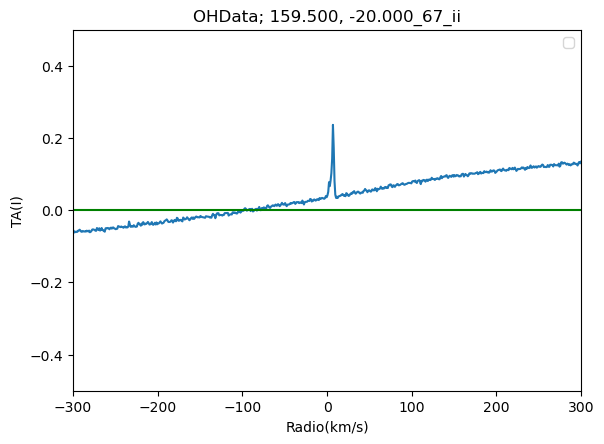

In [8]:
gooddata = np.where((x >= -300) & (x <= 300))
x = x[gooddata]
y = y[gooddata]

plt.xlim([-300, 300])
plt.ylim([-.50, .50])
plt.plot(x,y)
plt.axhline(0, color='green')
plt.xlabel('Radio(km/s)') # Creates a label for the x axis
plt.ylabel('TA(I)') # Creates a label for the y axis
plt.title('OHData; 159.500, -20.000_67_ii') # Creates a title for the plot
plt.legend()
plt.tight_layout(pad=2.0) # so data doesn't overlap

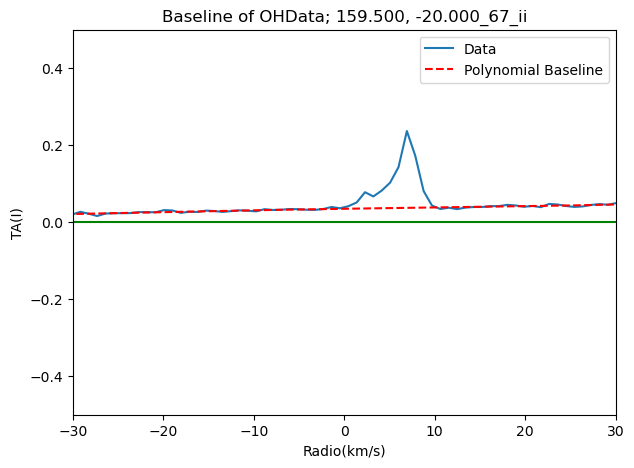

In [56]:
#Create a model and set initial parameters
degree = 4
poly_model = PolynomialModel(degree=degree)

# Baseline regions:
gooddata1 = list(np.where((x >= -30) & (x <= 0))[0])
gooddata2 = list(np.where((x >= 10) & (x <= 30))[0])
gooddata = gooddata1 + gooddata2

# Do the fitting:
params = poly_model.guess(y[gooddata], x=x[gooddata])
result = poly_model.fit(y[gooddata], params, x=x[gooddata])

#params =  poly_model.guess(y, x=x)
#result = poly_model.fit(y, params, x=x)
#print(result.fit_report())
# generates fitted values
y_eval = poly_model.eval(result.params, x=x)

# Plot data and baseline
plt.figure(figsize=(7, 5))
plt.xlim([-30, 30])
plt.ylim([-.50, .50])
plt.plot(x, y, label='Data')
plt.axhline(0, color='green')
plt.plot(x, y_eval, label='Polynomial Baseline', color='red', linestyle='--')
plt.xlabel('Radio(km/s)') # Creates a label for the x axis
plt.ylabel('TA(I)') # Creates a label for the y axis
plt.title('Baseline of OHData; 159.500, -20.000_67_ii') # Creates a title for the plot
plt.legend()
plt.show()

In [42]:
y_sub = y - y_eval

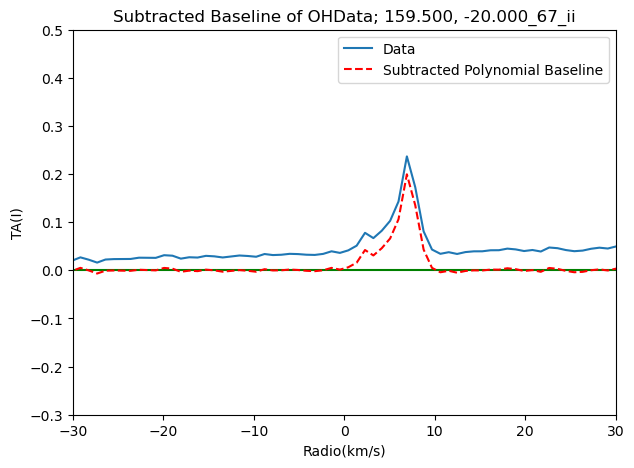

In [43]:
# Baseline regions:
gooddata1 = list(np.where((x >= -30) & (x <= 0))[0])
gooddata2 = list(np.where((x >= 10) & (x <= 30))[0])
gooddata = gooddata1 + gooddata2
# Do the fitting:
params = poly_model.guess(y_sub[gooddata], x=x[gooddata])
result = poly_model.fit(y_sub[gooddata], params, x=x[gooddata])
# Plot data and baseline
plt.figure(figsize=(7, 5))
plt.xlim([-30, 30])
plt.ylim([-.30, .50])
plt.axhline(0, color='green')
plt.plot(x, y, label='Data')
plt.plot(x, y_sub, label='Subtracted Polynomial Baseline', color='red', linestyle='--')
plt.xlabel('Radio(km/s)') # Creates a label for the x axis
plt.ylabel('TA(I)') # Creates a label for the y axis
plt.title('Subtracted Baseline of OHData; 159.500, -20.000_67_ii') # Creates a title for the plot
plt.legend()
plt.show()

In [20]:
# RMS red
noise=np.std(y[gooddata]) * u.K
noise

<Quantity 0.03537043 K>

In [21]:
noise_sub=np.std(y_sub[gooddata]) * u.K
noise_sub

<Quantity 0.03018533 K>

In [44]:
# Computing the Integral
def integral(vel, ta, bounds, deltav):
    mask = (vel >= bounds[0]) & (vel <= bounds[1])
    deltav = vel[1]-vel[0]
    return np.sum(ta[mask])*deltav

In [45]:
vel = x
ta = y_sub
deltav = vel[1]-vel[0]
bounds = [-15, 15]
# Baseline Subtraction
poly_model = PolynomialModel(degree=4)
gooddata = np.where((vel >= -15) & (vel <= 15))[0]
params = poly_model.guess(ta[gooddata], x=vel[gooddata])
result = poly_model.fit(ta[gooddata], params, x=vel[gooddata])
y_eval = poly_model.eval(result.params, x=vel)
ta = y - y_eval
# Compute Integral
result = integral(vel, ta, bounds, deltav)
print(f"Integral from {bounds[0]} to {bounds[1]} = {result}")

Integral from -15 to 15 = 1.0280297877802251


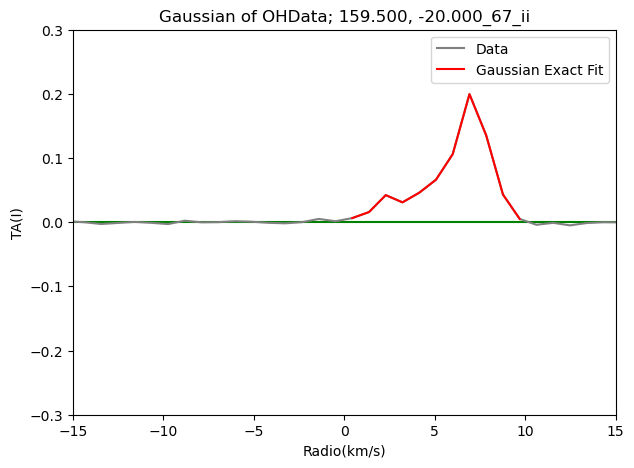

In [73]:
# Gaussian Model-exact fit
gauss_model=GaussianModel()
region = np.where((x >= 0) & (x <= 10))[0]

# Plot data and baseline
plt.figure(figsize=(7, 5))
plt.axhline(0, color='green')
plt.plot(x, y_sub, label='Data', linestyle='solid', color='grey')
plt.xlim([-15, 15])
plt.ylim([-.3, .3])
plt.plot(x[region], y_sub[region], '-',label='Gaussian Exact Fit',color='r')
plt.xlabel('Radio(km/s)') # Creates a label for the x axis
plt.ylabel('TA(I)') # Creates a label for the y axis
plt.title('Gaussian of OHData; 159.500, -20.000_67_ii') # Creates a title for the plot
plt.legend()
plt.show()

In [74]:
# Gaussian Fit
# params = gauss_model.guess(y_sub[region], x=x[region])
# regionfit = gauss_model.fit(y_sub[region], params, x=x[region])
# y_gauss_region = gauss_model.eval(params, x=x)

# Better fit of Gaussian
def gaussFit(vel, ta, bounds):
    '''
    Purpose:
    This function fits 4 features in a single spectrum, the features assumed to be the Local arm, inter arm, perseus arm, and outer arm.
    
    Input:
    vel -- x axes, velocity
    ta -- y axes, antenna temperature
    bounds -- an array of bounds for np.where commands later in the function to setup fit ranges.
    n = number of gaussian components

    Output:
    fitResult -- an array of 3 fit results from LMFIT for a single gaussian
    '''
    x=vel 
    y_sub=ta
    # Set bounds:
    region = np.where((x >= bounds[0]) & (x <= bounds[1]))[0]
    # Initial Guess of the parameters
    params = gauss_model.guess(y_sub[region], x=x[region])
    # Actual best fit to the data, given initial guess
    regionfit= gauss_model.fit(y_sub[region], params, x=x[region])
    #fitresult = [region1fit, region2fit, region3fit]
    fitresult = [regionfit]
    return fitresult

In [75]:
fitResult = gaussFit(x, y_sub, bounds = [0, 10])

In [76]:
fitResult[0].params

name,value,standard error,relative error,initial value,min,max,vary,expression
amplitude,0.54510193,0.06398729,(11.74%),0.5401055238257703,-inf,inf,True,
center,6.91407641,0.16281349,(2.35%),6.923127708792452,-inf,inf,True,
sigma,1.20210045,0.16318498,(13.57%),0.9259097624124042,0.00000000,inf,True,
fwhm,2.83073018,0.38427127,(13.57%),2.180350826723978,-inf,inf,False,2.3548200*sigma
height,0.18090353,0.02122726,(11.73%),0.2327126774820481,-inf,inf,False,"0.3989423*amplitude/max(1e-15, sigma)"


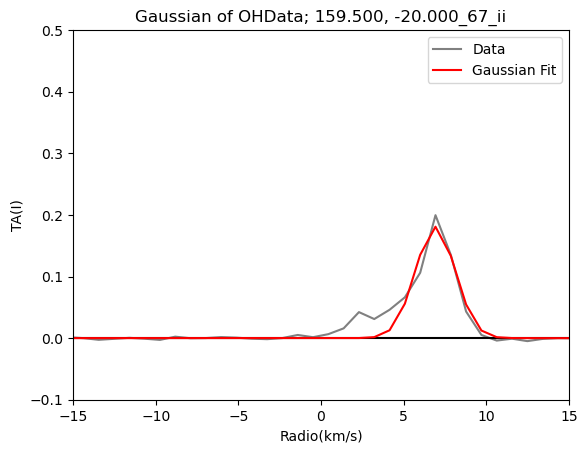

In [77]:
y_gauss_region = gauss_model.eval(fitResult[0].params, x=x)
# plot
plt.plot(x, y_sub, label='Data', linestyle='solid', color='grey')
plt.axhline(0, color='k')
plt.xlim([-15, 15])
plt.ylim([-.1, .5])
plt.plot(x, y_gauss_region, '-',label='Gaussian Fit',color='red')
plt.xlabel('Radio(km/s)') # Creates a label for the x axis
plt.ylabel('TA(I)') # Creates a label for the y axis
plt.title('Gaussian of OHData; 159.500, -20.000_67_ii') # Creates a title for the plot
plt.legend()
plt.show()